In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ASUS/Downloads/50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe().corr()*100

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,100.000000,88.679210,99.894451,96.092197
Administration,88.679210,100.000000,90.222666,97.161387
Marketing Spend,99.894451,90.222666,100.000000,97.111714
Profit,96.092197,97.161387,97.111714,100.000000


In [6]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [8]:
ct = ColumnTransformer(transformers=[("encoder" , OneHotEncoder(), [3])], remainder ='passthrough')
x = np.array(ct.fit_transform(x))

In [9]:
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [10]:
# splitting data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [11]:
# feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [12]:
# model building

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

model_lr.fit(x_train_sc,y_train)


LinearRegression()

In [13]:
# predicting test results

y_pred = model_lr.predict(x_test_sc)

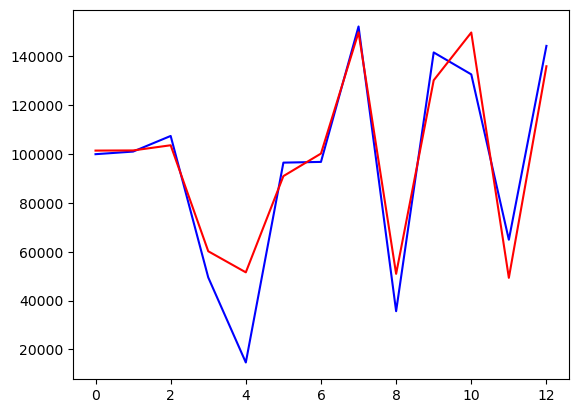

In [23]:
# plotting the testing vs predicted data

plt.plot(y_test, color="blue",label='TEST')
plt.plot(y_pred, color="red",label='PREDICTED')
plt.show()

In [16]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)*100

88.81768740100405

In [25]:
# out of sample prediction

#New york
#120k
#120k
#400k

data = [[0.0,0.0,1.0,120000,120000,400000]]

data_sc = sc.transform(data)

ND = model_lr.predict(data_sc)

ND


array([[152699.97214495]])